In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.(you can only unzip a zipped tuple once before it is removed from the computer memory.  )
# this step is unzipping the pairs of lats and lngs into the coordinates list. 
coordinates = list(lat_lngs)

In [6]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

639

In [8]:
#import requests library 
import requests

# Import the weather API key.
from config import weather_api_key

In [9]:
# Build the basic URL for the OpenWeatherMap with your weather_api_key added to the URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [10]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [ ]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

In [ ]:
# Loop through all the cities in our list. 
#This is not a good option for retrieving the cities because it pulls the index of the city and will cause errors. in order to get the city name we need to create another for loop. instead of creating a second for loop we can use the code with enumerate such as in the next box.  
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

In [13]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 40 of Set 13 | hilo
Processing Record 41 of Set 13 | new norfolk
Processing Record 42 of Set 13 | barentsburg
City not found. Skipping...
Processing Record 43 of Set 13 | okmulgee
Processing Record 44 of Set 13 | kendari
Processing Record 45 of Set 13 | chapais
Processing Record 46 of Set 13 | mys shmidta
City not found. Skipping...
Processing Record 47 of Set 13 | taolanaro
City not found. Skipping...
Processing Record 48 of Set 13 | bluff
Processing Record 49 of Set 13 | ashland
Processing Record 50 of Set 13 | atuona
Processing Record 51 of Set 13 | punta arenas
Processing Record 52 of Set 13 | faanui
Processing Record 53 of Set 13 | puerto madryn
Processing Record 54 of Set 13 | narsaq
Processing Record 55 of Set 13 | ancud
Processing Record 56 of Set 13 | coihaique
Processing Record 57 of Set 13 | vao
Processing Record 58 of Set 13 | mataura
Processing Record 59 of Set 13 | yablonovo
Processing Record 60 of Set 13 | ternate
Processing Record 61 of Set 13 | dire
P

Processing Record 31 of Set 16 | gazanjyk
Processing Record 32 of Set 16 | nikolskoye
Processing Record 33 of Set 16 | verkhniy avzyan
Processing Record 34 of Set 16 | wilmington
Processing Record 35 of Set 16 | lubango
Processing Record 36 of Set 16 | phu ly
Processing Record 37 of Set 16 | pangkalanbuun
Processing Record 38 of Set 16 | banda aceh
Processing Record 39 of Set 16 | port arthur
Processing Record 40 of Set 16 | kirakira
Processing Record 41 of Set 16 | san jose
Processing Record 42 of Set 16 | murmashi
Processing Record 43 of Set 16 | korbach
Processing Record 44 of Set 16 | creel
Processing Record 45 of Set 16 | mackenzie
Processing Record 46 of Set 16 | kracheh
City not found. Skipping...
Processing Record 47 of Set 16 | pitimbu
Processing Record 48 of Set 16 | port lincoln
Processing Record 49 of Set 16 | dubai
Processing Record 50 of Set 16 | albany
Processing Record 1 of Set 17 | richards bay
Processing Record 2 of Set 17 | parrita
Processing Record 3 of Set 17 | pan

Processing Record 16 of Set 20 | hulan ergi
Processing Record 17 of Set 20 | bandarbeyla
Processing Record 18 of Set 20 | zyryanka
Processing Record 19 of Set 20 | edson
Processing Record 20 of Set 20 | yeletskiy
City not found. Skipping...
Processing Record 21 of Set 20 | sokoni
Processing Record 22 of Set 20 | belyy yar
Processing Record 23 of Set 20 | tsihombe
City not found. Skipping...
Processing Record 24 of Set 20 | sioux lookout
Processing Record 25 of Set 20 | san andres
Processing Record 26 of Set 20 | talara
Processing Record 27 of Set 20 | korla
Processing Record 28 of Set 20 | bidor
Processing Record 29 of Set 20 | roquetas de mar
Processing Record 30 of Set 20 | urucara
Processing Record 31 of Set 20 | santa rosa
Processing Record 32 of Set 20 | cap-aux-meules
Processing Record 33 of Set 20 | fukue
Processing Record 34 of Set 20 | coquimbo
Processing Record 35 of Set 20 | buin
Processing Record 36 of Set 20 | gboko
Processing Record 37 of Set 20 | koraput
Processing Recor

Processing Record 50 of Set 23 | lucapa
Processing Record 1 of Set 24 | sainte-agathe-des-monts
Processing Record 2 of Set 24 | coffs harbour
Processing Record 3 of Set 24 | mrirt
City not found. Skipping...
Processing Record 4 of Set 24 | caraballeda
Processing Record 5 of Set 24 | warqla
City not found. Skipping...
Processing Record 6 of Set 24 | tikhvin
Processing Record 7 of Set 24 | komsomolskiy
Processing Record 8 of Set 24 | bud
Processing Record 9 of Set 24 | urdzhar
City not found. Skipping...
Processing Record 10 of Set 24 | ambanja
Processing Record 11 of Set 24 | rehoboth
Processing Record 12 of Set 24 | grand centre
City not found. Skipping...
Processing Record 13 of Set 24 | seljord
Processing Record 14 of Set 24 | monrovia
Processing Record 15 of Set 24 | prince rupert
Processing Record 16 of Set 24 | craig
Processing Record 17 of Set 24 | el balyana
City not found. Skipping...
Processing Record 18 of Set 24 | samandag
Processing Record 19 of Set 24 | ust-kuyga
Processin

In [14]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hilo,19.7297,-155.0900,78.80,53,20,8.05,US,2021-03-03 01:06:49
1,New Norfolk,-42.7826,147.0587,61.00,58,100,1.99,AU,2021-03-03 01:06:49
2,Okmulgee,35.6234,-95.9605,57.20,26,1,3.44,US,2021-03-03 01:06:49
3,Kendari,-3.9450,122.4989,79.45,83,91,2.44,ID,2021-03-03 01:06:50
4,Chapais,49.7834,-74.8492,-7.60,77,20,1.21,CA,2021-03-03 01:06:50
5,Bluff,-46.6000,168.3333,70.00,64,53,10.00,NZ,2021-03-03 01:06:50
6,Ashland,40.8167,-82.2665,33.01,69,1,6.91,US,2021-03-03 01:06:51
7,Atuona,-9.8000,-139.0333,80.42,70,0,10.54,PF,2021-03-03 01:06:51
8,Punta Arenas,-53.1500,-70.9167,57.00,50,20,9.22,CL,2021-03-03 01:02:52
9,Faanui,-16.4833,-151.7500,82.51,77,100,10.25,PF,2021-03-03 01:06:52


In [16]:
#reorder the columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hilo,US,2021-03-03 01:06:49,19.7297,-155.0900,78.80,53,20,8.05
1,New Norfolk,AU,2021-03-03 01:06:49,-42.7826,147.0587,61.00,58,100,1.99
2,Okmulgee,US,2021-03-03 01:06:49,35.6234,-95.9605,57.20,26,1,3.44
3,Kendari,ID,2021-03-03 01:06:50,-3.9450,122.4989,79.45,83,91,2.44
4,Chapais,CA,2021-03-03 01:06:50,49.7834,-74.8492,-7.60,77,20,1.21
...,...,...,...,...,...,...,...,...,...
579,Devils Lake,US,2021-03-03 01:09:41,48.1128,-98.8651,36.00,98,98,6.29
580,Pangoa,PE,2021-03-03 01:09:42,-12.1167,-73.0000,69.06,97,0,2.57
581,Tomatlan,MX,2021-03-03 01:09:42,19.9333,-105.2500,72.90,79,0,3.15
582,Singaparna,ID,2021-03-03 01:09:42,-7.3515,108.1110,78.73,74,79,1.05


In [17]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [18]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

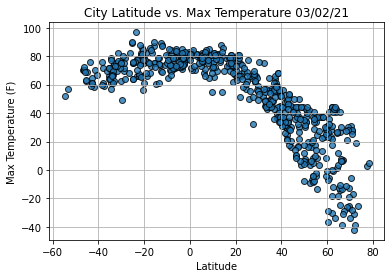

In [19]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

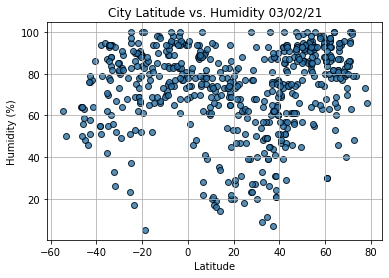

In [20]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

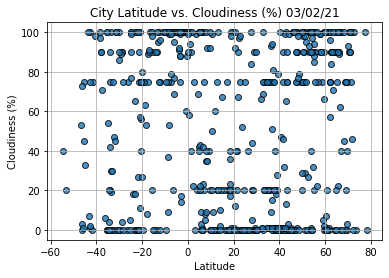

In [21]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

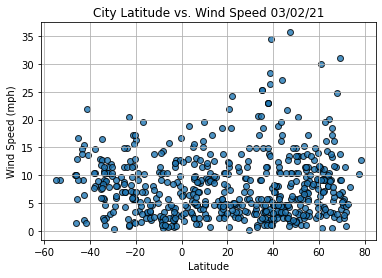

In [23]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()